In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import mglearn
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.shape

(1460, 81)

In [4]:
test_df.shape

(1459, 80)

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
correlations = train_df.corr()

In [8]:
correlations['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

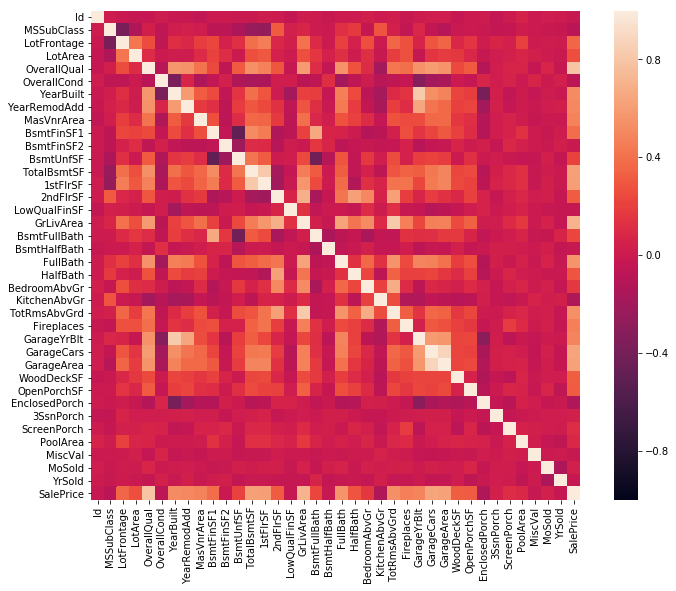

In [9]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlations, vmin=-1, vmax=1, square=True)

Here we have the most corrlated features to the target:
    - OverallQual
    - GrLivArea
    - GarageCars
    - GarageArea
    - TotalBsmtSF
    - 1stFlrSF
    - FullBath
    - TotRmsAbvGrd
    - YearBuilt


In [10]:
#cols = ['SalePrice','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt']

#sns.pairplot(train_df[cols], kind="reg")

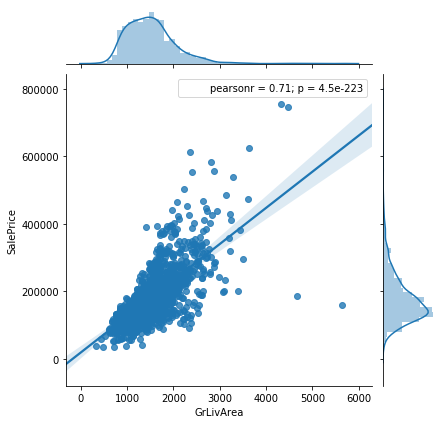

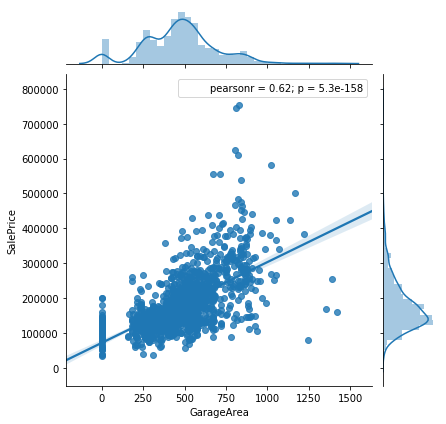

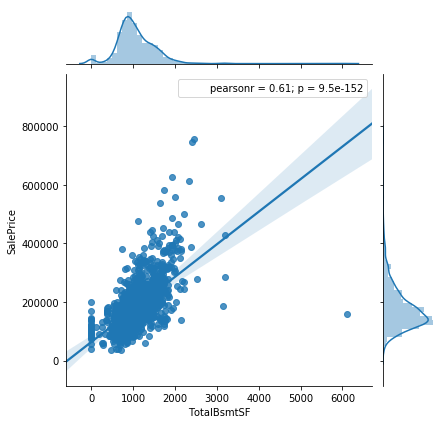

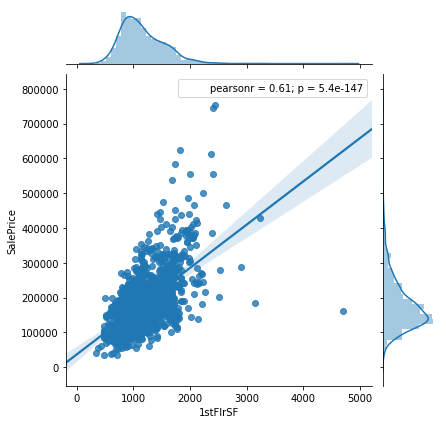

In [11]:
sns.jointplot(x=train_df['GrLivArea'], y=train_df['SalePrice'], kind='reg')
sns.jointplot(x=train_df['GarageArea'], y=train_df['SalePrice'], kind='reg')
sns.jointplot(x=train_df['TotalBsmtSF'], y=train_df['SalePrice'], kind='reg')
sns.jointplot(x=train_df['1stFlrSF'], y=train_df['SalePrice'], kind='reg')

# Correlation between GarageCars & GarageArea

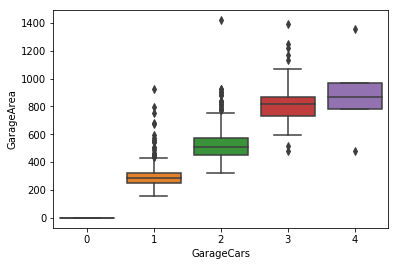

In [12]:
sns.boxplot(x=train_df['GarageCars'], y=train_df['GarageArea'])

# Correlation between TotRmsAbvGrd & GrLivArea

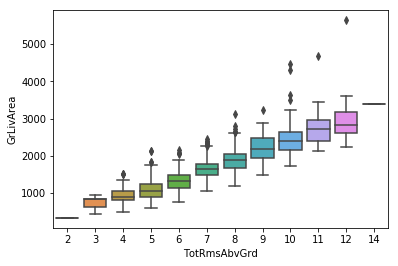

In [13]:
sns.boxplot(x=train_df['TotRmsAbvGrd'], y=train_df['GrLivArea'])

# Missing Data

In [14]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Feature', 'Total']
missing_df['Percentage'] = ((missing_df['Total'] / train_df.shape[0])*100)
missing_df.sort_values('Percentage', ascending=False, inplace=True)
missing_df.head(10)

,Feature,Total,Percentage
72,PoolQC,1453,99.520548
74,MiscFeature,1406,96.301370
6,Alley,1369,93.767123
73,Fence,1179,80.753425
57,FireplaceQu,690,47.260274
3,LotFrontage,259,17.739726
59,GarageYrBlt,81,5.547945
64,GarageCond,81,5.547945
58,GarageType,81,5.547945
60,GarageFinish,81,5.547945


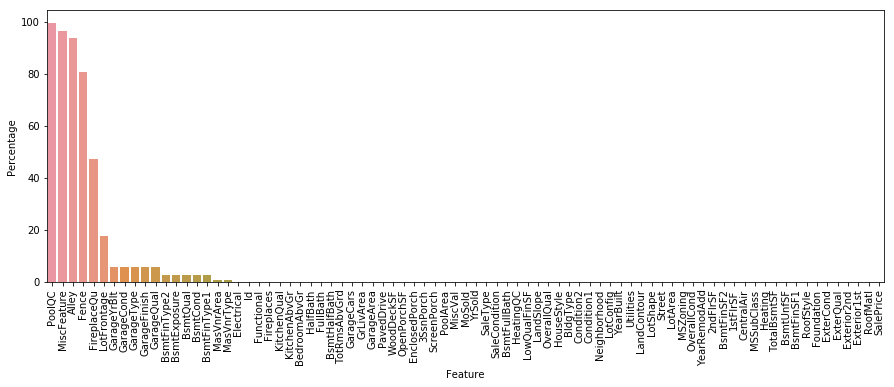

In [15]:
f, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation='90')
sns.barplot(x=missing_df['Feature'], y=missing_df['Percentage'])

In [16]:
ml_df_train = train_df[['OverallQual', 'GrLivArea', 'GarageArea', 'SalePrice']]
ml_df_test = test_df[['OverallQual', 'GrLivArea', 'GarageArea']]

In [17]:
ml_df_train = ml_df_train.dropna()
ml_df_test = ml_df_test.dropna()

# Data Splitting

In [18]:
X_train = ml_df_train.drop("SalePrice", axis=1)
Y_train = ml_df_train["SalePrice"]

X_test  = ml_df_test.copy()
X_train.shape, Y_train.shape, X_test.shape

((1460, 3), (1460,), (1458, 3))

# Models

In [23]:
from sklearn.linear_model import LinearRegression, Lasso

lasso = Lasso(normalize=True)
lasso.fit(X_train, Y_train)
y_pred = lasso.predict(X_test)

lasso_acc = lasso.score(X_train, Y_train)

In [25]:
lasso_acc

0.73944691210537949

In [26]:
from sklearn.linear_model import LinearRegression, Lasso

lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

lr_acc = lr.score(X_train, Y_train)

In [27]:
lr_acc

0.73944725147482449